<a href="https://colab.research.google.com/github/Donggeon2960/LGAIMER-PRACTICE/blob/main/Linear_Regression_%EA%B3%BC%EC%A0%9C_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LG Aimers 해커톤 과제: 온라인 채널 제품 판매량 예측
# Linear Regression 실전 적용 과제


🎯 과제 목표:
온라인 쇼핑몰의 과거 판매 데이터를 바탕으로 향후 3주간(21일)의
제품별 일별 판매량을 예측하는 Linear Regression 모델을 구축하세요.

📋 과제 구성:
1. 데이터 탐색 및 분석 (EDA)
2. 특성 엔지니어링 (Feature Engineering)
3. Linear Regression 모델 구현
4. 성능 평가 및 해석
5. 예측 결과 생성

⚡ 평가 기준:
- RMSE (Root Mean Squared Error) - 낮을수록 좋음
- R² Score - 1에 가까울수록 좋음
- 코드의 논리성과 해석의 정확성


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("🏆 LG Aimers 해커톤 과제: 온라인 판매량 예측")
print("=" * 60)
print("Linear Regression을 활용하여 온라인 쇼핑몰의 제품 판매량을 예측하세요!")
print()

🏆 LG Aimers 해커톤 과제: 온라인 판매량 예측
Linear Regression을 활용하여 온라인 쇼핑몰의 제품 판매량을 예측하세요!



# 데이터 정보 (건드리지 마세요!)



데이터 컬럼 설명:
- date: 날짜
- product: 제품명 (smartphone, laptop, tablet, smartwatch, earphone, keyboard)
- category: 제품 카테고리
- base_price: 기본 가격 (할인 전)
- discount_rate: 할인율 (0~0.5)
- actual_price: 실제 판매 가격 (할인 후)
- marketing_spend: 마케팅 지출액
- stock_level: 재고 수준 (0.1=품절임박, 1.0=충분)
- competitor_price: 경쟁사 가격
- review_score: 리뷰 평점 (3.5~5.0)
- review_count: 리뷰 개수
- page_views: 제품 페이지 조회수
- conversion_rate: 전환율 (0.01~0.05)
- day_of_week: 요일 (0=월요일, 6=일요일)
- month: 월 (1~12)
- is_weekend: 주말 여부 (1=주말, 0=평일)
- is_holiday: 휴일 여부 (1=휴일, 0=평일)
- sales: 판매량 (예측해야 할 타겟 변수)


# 데이터 로드 (먼저 데이터 생성기 코드를 실행해서 CSV 파일을 만드세요!)

In [2]:
print("📊 데이터 로딩 중...")
df = pd.read_csv('online_sales_data.csv')
df['date'] = pd.to_datetime(df['date'])  # 날짜 컬럼을 datetime 타입으로 변환
print(f"✅ 데이터 로드 완료! 총 {len(df):,}개 레코드")
print()

📊 데이터 로딩 중...
✅ 데이터 로드 완료! 총 2,190개 레코드



# 기본 정보 출력

In [3]:
print("📋 데이터 기본 정보:")
print(f"   - 기간: {df['date'].min().strftime('%Y-%m-%d')} ~ {df['date'].max().strftime('%Y-%m-%d')}")
print(f"   - 제품 수: {df['product'].nunique()}개")
print(f"   - 총 판매량: {df['sales'].sum():.0f}개")
print(f"   - 평균 일별 판매량: {df['sales'].mean():.1f}개")
print()

print("첫 5개 데이터 미리보기:")
print(df.head())
print()

📋 데이터 기본 정보:
   - 기간: 2023-01-01 ~ 2023-12-31
   - 제품 수: 6개
   - 총 판매량: 392947개
   - 평균 일별 판매량: 179.4개

첫 5개 데이터 미리보기:
        date     product     category  base_price  discount_rate  \
0 2023-01-01  smartphone  electronics      104.97         0.1731   
1 2023-01-01      laptop     computer      123.87         0.2871   
2 2023-01-01      tablet       mobile      193.99         0.1523   
3 2023-01-01  smartwatch     wearable      252.19         0.2217   
4 2023-01-01    earphone        audio      293.23         0.1620   

   actual_price  marketing_spend  stock_level  competitor_price  review_score  \
0         86.80            29.92       0.8796             95.53          4.56   
1         88.31           228.14       0.5105            105.32          3.80   
2        164.45            17.50       0.9184            152.84          4.49   
3        196.29           158.28       0.8459            192.04          3.92   
4        245.74           737.61       0.1666            240.63    

# 🔥 과제 1: 탐색적 데이터 분석 (EDA)

In [4]:
print("📊 과제 1: 탐색적 데이터 분석 (EDA)")
print("=" * 50)
print("다음 질문들에 답하기 위한 분석을 수행하고 코드를 작성하세요.")
print()

# TODO 1-1: 기본 통계 분석
print("🔍 TODO 1-1: 판매량에 대한 기본 통계 분석")
print("다음 정보를 계산하여 출력하세요:")
print("   - 판매량의 평균, 중앙값, 표준편차")
print("   - 판매량이 가장 높은 제품과 낮은 제품")
print("   - 요일별 평균 판매량")
print()

# 여기에 코드를 작성하세요
# ==========================================



# 힌트: df['sales'].describe(), df.groupby() 등을 활용

# ==========================================

print("\n" + "="*50)

# TODO 1-2: 상관관계 분석
print("🔗 TODO 1-2: 판매량과 다른 변수들 간의 상관관계 분석")
print("다음을 분석하고 결과를 해석하세요:")
print("   - 가격과 판매량의 상관계수")
print("   - 할인율과 판매량의 상관계수")
print("   - 마케팅 지출과 판매량의 상관계수")
print("   - 가장 강한 상관관계를 보이는 변수 3개")
print()

# 여기에 코드를 작성하세요
# ==========================================

# 🔥 여기서 구현하세요! 🔥

# 힌트: df.corr(), 상관계수 해석 (-1 ~ 1 범위)

# ==========================================

print("\n" + "="*50)

# TODO 1-3: 시각화
print("📈 TODO 1-3: 핵심 인사이트를 보여주는 그래프 그리기")
print("다음 그래프를 그리고 각각에서 발견한 인사이트를 설명하세요:")
print("   - 제품별 평균 판매량 막대그래프")
print("   - 할인율 vs 판매량 산점도")
print("   - 요일별 판매량 박스플롯 또는 바이올린플롯")
print()

# 여기에 코드를 작성하세요
# ==========================================

# 🔥 여기서 구현하세요! 🔥

# 힌트: plt.figure(), plt.subplot(), sns.barplot(), plt.scatter() 등

# ==========================================

print("\n" + "="*50)

📊 과제 1: 탐색적 데이터 분석 (EDA)
다음 질문들에 답하기 위한 분석을 수행하고 코드를 작성하세요.

🔍 TODO 1-1: 판매량에 대한 기본 통계 분석
다음 정보를 계산하여 출력하세요:
   - 판매량의 평균, 중앙값, 표준편차
   - 판매량이 가장 높은 제품과 낮은 제품
   - 요일별 평균 판매량


🔗 TODO 1-2: 판매량과 다른 변수들 간의 상관관계 분석
다음을 분석하고 결과를 해석하세요:
   - 가격과 판매량의 상관계수
   - 할인율과 판매량의 상관계수
   - 마케팅 지출과 판매량의 상관계수
   - 가장 강한 상관관계를 보이는 변수 3개


📈 TODO 1-3: 핵심 인사이트를 보여주는 그래프 그리기
다음 그래프를 그리고 각각에서 발견한 인사이트를 설명하세요:
   - 제품별 평균 판매량 막대그래프
   - 할인율 vs 판매량 산점도
   - 요일별 판매량 박스플롯 또는 바이올린플롯




In [8]:
# TODO 1-1: 기본 통계 분석

mean_sales = df['sales'].mean()
median_sales = df['sales'].median()
std_sales = df['sales'].std()

print(f"평균 판매량: {mean_sales:.1f}개")
print(f"중앙값 판매량: {median_sales:.1f}개")
print(f"표준편차 판매량: {std_sales:.1f}개")
print()

sales_by_product = df.groupby('product')['sales'].sum()
max_sales_product = sales_by_product.idxmax(), sales_by_product.max()
min_sales_product = sales_by_product.idxmin(), sales_by_product.min()

print(f"판매량이 가장 높은 제품: {max_sales_product[0]} ({max_sales_product[1]:.0f}개)")
print(f"판매량이 가장 낮은 제품: {min_sales_product[0]} ({min_sales_product[1]:.0f}개)")
print()

df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek
weekdays = ['월', '화', '수', '목', '금', '토', '일']
df['day_of_week'] = df['day_of_week'].apply(lambda x: weekdays[x])

sales_by_day = df.groupby('day_of_week')['sales'].mean()

print("요일별 평균 판매량:")
print(sales_by_day)

평균 판매량: 179.4개
중앙값 판매량: 174.4개
표준편차 판매량: 48.8개

판매량이 가장 높은 제품: keyboard (73966개)
판매량이 가장 낮은 제품: smartphone (56106개)

요일별 평균 판매량:
day_of_week
금    185.595128
목    176.935545
수    165.461859
월    146.349135
일    202.745597
토    221.560064
화    156.898365
Name: sales, dtype: float64


In [21]:
# TODO 1-2: 상관관계 분석

corr_price_sales = df['actual_price'].corr(df['sales'])
corr_discount_sales = df['discount_rate'].corr(df['sales'])
corr_marketing_sales = df['marketing_spend'].corr(df['sales'])

print(f"가격-판매량 상관계수: {corr_price_sales:.4f}")
print(f"할인율-판매량 상관계수: {corr_discount_sales:.4f}")
print(f"마케팅 지출-판매량 상관계수: {corr_marketing_sales:.4f}")
print()

cols = ['sales', 'actual_price', 'discount_rate', 'marketing_spend']
corr_matrix     = df[cols].corr()
corr_with_sales = corr_matrix['sales'].drop('sales')

top3 = corr_with_sales.abs().nlargest(3)
print("판매량과 가장 강한 상관변수 3개 (절댓값 순):")
print(top3)

가격-판매량 상관계수: 0.2494
할인율-판매량 상관계수: 0.3453
마케팅 지출-판매량 상관계수: 0.5288

판매량과 가장 강한 상관변수 3개 (절댓값 순):
marketing_spend    0.528817
discount_rate      0.345288
actual_price       0.249379
Name: sales, dtype: float64


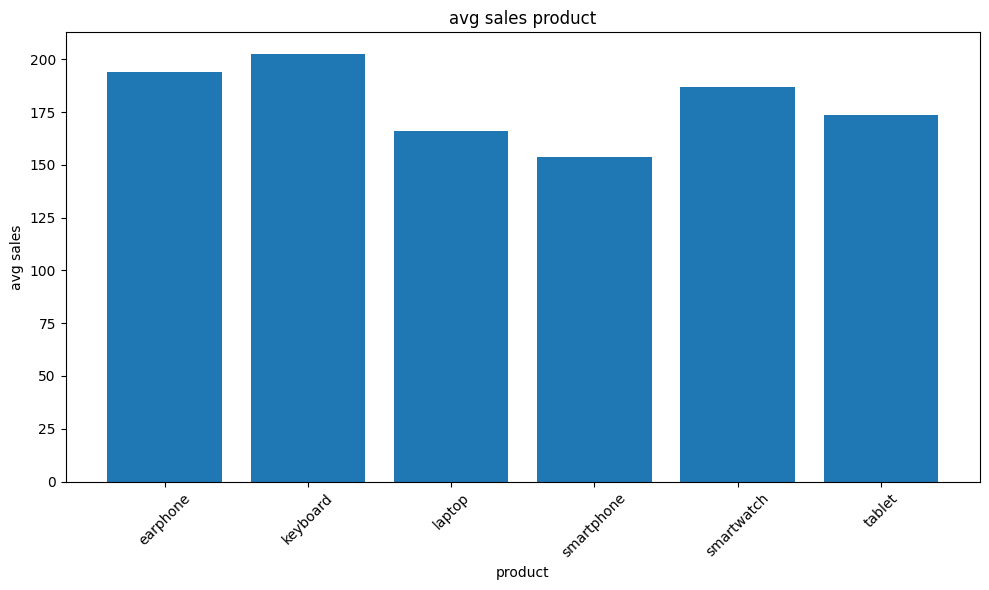

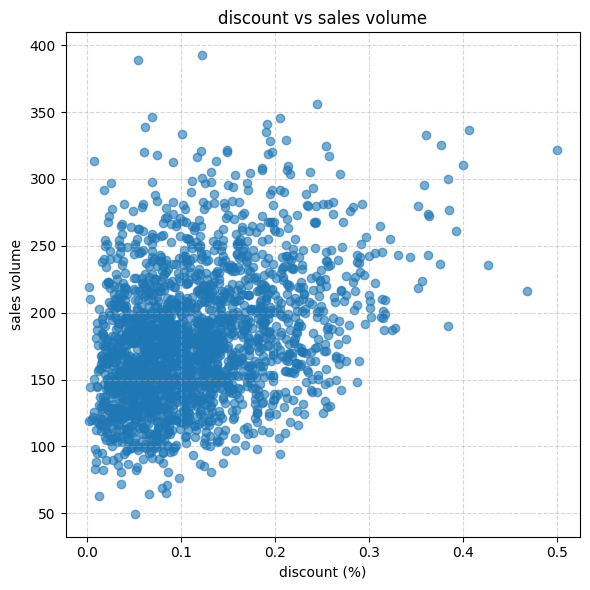

<Figure size 600x600 with 0 Axes>

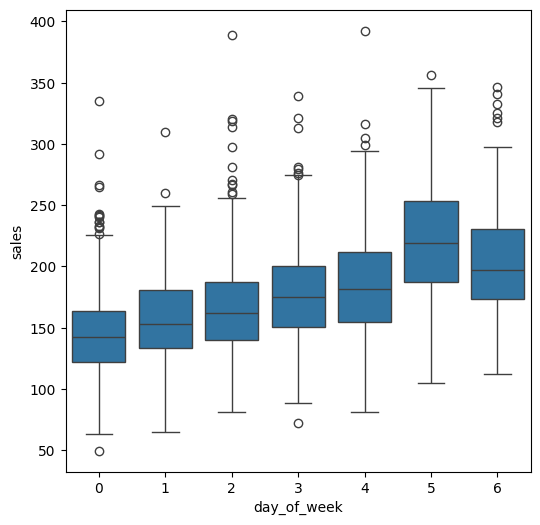

<Figure size 600x600 with 0 Axes>

In [28]:
# TODO 1-3: 시각화

sales_by_product = df.groupby('product')['sales'].mean()
plt.figure(figsize=(10, 6))
plt.bar(sales_by_product.index, sales_by_product.values)
plt.xlabel('product')
plt.ylabel('avg sales')
plt.title('avg sales product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(df['discount_rate'], df['sales'], alpha=0.6)  # alpha: 점 투명도
plt.title('discount vs sales volume')
plt.xlabel('discount (%)')
plt.ylabel('sales volume')
plt.grid(True, linestyle='--', alpha=0.5)                # 격자 표시
plt.tight_layout()
plt.show()

weekdays = ['월', '화', '수', '목', '금', '토', '일']
df['day_of_week'] = df['day_of_week'].apply(lambda x: weekdays.index(x))
plt.figure(figsize=(6, 6))
sns.boxplot(x='day_of_week', y='sales', data=df)
plt.figure(figsize=(6, 6))

# 🔥 과제 2: 특성 엔지니어링 (Feature Engineering)

In [ ]:

print("🔧 과제 2: 특성 엔지니어링")
print("=" * 50)
print("Linear Regression의 성능을 높이기 위한 새로운 특성을 만드세요.")
print()

# TODO 2-1: 파생 변수 생성
print("🆕 TODO 2-1: 다음 파생 변수들을 생성하세요")
print("   1. price_per_view: 페이지뷰 당 가격 (actual_price / page_views)")
print("   2. marketing_efficiency: 마케팅 효율성 (page_views / marketing_spend)")
print("   3. review_quality: 리뷰 품질 점수 (review_score * log(review_count + 1))")
print("   4. price_competitiveness: 가격 경쟁력 (competitor_price / actual_price)")
print("   5. 본인이 생각하는 의미있는 파생변수 2개 추가")
print()

# 여기에 코드를 작성하세요
# ==========================================

# 🔥 여기서 구현하세요! 🔥

# 예시:
# df['price_per_view'] = df['actual_price'] / df['page_views']

# ==========================================

print("\n" + "="*50)

# TODO 2-2: 범주형 변수 처리
print("🏷️  TODO 2-2: 범주형 변수를 수치형으로 변환하세요")
print("   - product와 category 변수를 One-Hot Encoding 또는 Label Encoding")
print("   - 어떤 방법을 선택했는지와 그 이유를 설명하세요")
print()

# 여기에 코드를 작성하세요
# ==========================================

# 🔥 여기서 구현하세요! 🔥

# 힌트: pd.get_dummies() 또는 sklearn.preprocessing.LabelEncoder

# ==========================================

print("\n" + "="*50)

In [30]:
# TODO 2-1: 파생 변수 생성

df['price_per_view'] = df['actual_price'] / df['page_views']

df['marketing_efficiency'] = df['page_views'] / df['marketing_spend']

df['review_quality'] = df['review_score'] * np.log(df['review_count'] + 1)

df['price_competitiveness'] = df['competitor_price'] / df['actual_price']

df['conversion_rate']=df['sales']/df['page_views']

df['marketing_ROI']=(df['sales']*df['actual_price']-df['marketing_spend'])/df['marketing_spend']

In [32]:
# TODO 2-2: 범주형 변수 처리

df_encoded = pd.get_dummies(
    df,
    columns=['product', 'category'],
    prefix=['prod', 'cat'],
    drop_first=False
)

print("원본 컬럼:", ['product', 'category'])
print("추가된 컬럼 샘플:", [c for c in df_encoded.columns if c.startswith('prod_')][:3] + [c for c in df_encoded.columns if c.startswith('cat_')][:3])


원본 컬럼: ['product', 'category']
추가된 컬럼 샘플: ['prod_earphone', 'prod_keyboard', 'prod_laptop', 'cat_accessory', 'cat_audio', 'cat_computer']


# 🔥 과제 3: Linear Regression 모델 구현

In [ ]:

print("🤖 과제 3: Linear Regression 모델 구현")
print("=" * 50)
print("학습용과 테스트용 데이터를 분할하고 모델을 학습시키세요.")
print()

# TODO 3-1: 데이터 분할
print("✂️  TODO 3-1: 훈련/테스트 데이터 분할")
print("   - 마지막 21일을 테스트 데이터로 사용 (실제 해커톤처럼)")
print("   - 그 이전 데이터를 훈련 데이터로 사용")
print("   - 분할 결과를 확인하고 출력하세요")
print()

# 여기에 코드를 작성하세요
# ==========================================

# 🔥 여기서 구현하세요! 🔥

# 힌트:
# split_date = df['date'].max() - pd.Timedelta(days=21)
# train_data = df[df['date'] <= split_date]
# test_data = df[df['date'] > split_date]

# ==========================================

print("\n" + "="*30)

# TODO 3-2: 특성 선택 및 전처리
print("⚙️ TODO 3-2: 모델링을 위한 특성 선택 및 전처리")
print("   1. Linear Regression에 사용할 특성들을 선택하세요")
print("   2. 'sales'를 타겟 변수로 설정하세요")
print("   3. 필요시 특성 스케일링을 적용하세요")
print("   4. 선택한 특성들과 그 이유를 설명하세요")
print()

# 여기에 코드를 작성하세요
# ==========================================

# 🔥 여기서 구현하세요! 🔥

# 힌트:
# feature_cols = ['actual_price', 'discount_rate', ...]  # 특성 선택
# X_train = train_data[feature_cols]
# y_train = train_data['sales']
# X_test = test_data[feature_cols]
# y_test = test_data['sales']

# 스케일링이 필요하다면:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# ==========================================

print("\n" + "="*30)

# TODO 3-3: 모델 학습 및 예측
print("🎯 TODO 3-3: Linear Regression 모델 학습 및 예측")
print("   1. sklearn의 LinearRegression을 사용해 모델을 학습시키세요")
print("   2. 훈련 데이터와 테스트 데이터에 대한 예측을 수행하세요")
print("   3. 모델의 계수(coefficients)와 절편(intercept)을 출력하세요")
print()

# 여기에 코드를 작성하세요
# ==========================================

# 🔥 여기서 구현하세요! 🔥

# 힌트:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)  # 또는 X_train_scaled
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# ==========================================

print("\n" + "="*50)

In [36]:
# TODO 3-1: 데이터 분할

df['date']=pd.to_datetime(df['date'])
split_date = df['date'].max() - pd.Timedelta(days=21)

train_data = df[df['date'] <= split_date]
test_data = df[df['date'] > split_date]

print("분할 기준일:", split_date.strftime('%Y-%m-%d'))
print("훈련 데이터 기간:", train_data['date'].min(), train_data['date'].max())
print("테스트 데이터 기간:", test_data['date'].min(), test_data['date'].max())
print("훈련 데이터:", train_data.shape)
print("테스트 데이터:", test_data.shape)

분할 기준일: 2023-12-10
훈련 데이터 기간: 2023-01-01 00:00:00 2023-12-10 00:00:00
테스트 데이터 기간: 2023-12-11 00:00:00 2023-12-31 00:00:00
훈련 데이터: (2064, 23)
테스트 데이터: (126, 23)


In [39]:
# TODO 3-2: 특성 선택 및 전처리

feature_cols = [
    'actual_price',
    'discount_rate',
    'marketing_spend',
    'stock_level',
    'competitor_price',
    'review_score',
    'review_count',
    'page_views',
    'conversion_rate',
    'day_of_week',
    'month',
    'is_weekend',
    'is_holiday',
]

X_train = train_data[feature_cols]
y_train = train_data['sales']
X_test = test_data[feature_cols]
y_test = test_data['sales']

#특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# TODO 3-3: 모델 학습 및 예측

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("모델 계수 (Feature별 가중치):")
for feat, coef in zip(feature_cols, model.coef_):
    print(f"  - {feat}: {coef:.4f}")

print(f"\n절편 (intercept): {model.intercept_:.4f}")

모델 계수 (Feature별 가중치):
  - actual_price: -0.0270
  - discount_rate: 12.1887
  - marketing_spend: -0.0007
  - stock_level: 2.7209
  - competitor_price: 0.0101
  - review_score: 0.4756
  - review_count: 0.0330
  - page_views: 0.1319
  - conversion_rate: 1093.4457
  - day_of_week: 0.8949
  - month: -0.3049
  - is_weekend: 0.6052
  - is_holiday: 0.0042

절편 (intercept): -153.8524


# 🔥 과제 4: 성능 평가 및 해석

In [ ]:
print("📊 과제 4: 성능 평가 및 해석")
print("=" * 50)

# TODO 4-1: 성능 지표 계산
print("📈 TODO 4-1: 다음 성능 지표들을 계산하고 해석하세요")
print("   1. 훈련 데이터: RMSE, R², MAE")
print("   2. 테스트 데이터: RMSE, R², MAE")
print("   3. 각 지표가 무엇을 의미하는지 설명하세요")
print("   4. 과적합(overfitting) 여부를 판단하세요")
print()

# 여기에 코드를 작성하세요
# ==========================================

# 🔥 여기서 구현하세요! 🔥

# 힌트:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# train_r2 = r2_score(y_train, y_train_pred)

# ==========================================

print("\n" + "="*30)

# TODO 4-2: 특성 중요도 분석
print("🔍 TODO 4-2: 특성 중요도 분석 및 비즈니스 해석")
print("   1. 각 특성의 회귀 계수를 확인하세요")
print("   2. 가장 영향력이 큰 특성 5개를 찾으세요")
print("   3. 계수의 부호(+/-)가 비즈니스적으로 합리적인지 해석하세요")
print("   4. 예상과 다른 결과가 있다면 그 이유를 추론하세요")
print()

# 여기에 코드를 작성하세요
# ==========================================

# 🔥 여기서 구현하세요! 🔥

# 힌트:
# coefficients = model.coef_
# feature_importance = pd.DataFrame({
#     'feature': feature_cols,  # 사용한 특성 이름들
#     'coefficient': coefficients,
#     'abs_coefficient': np.abs(coefficients)
# }).sort_values('abs_coefficient', ascending=False)

# ==========================================

print("\n" + "="*50)

In [44]:
# TODO 4-1: 성능 지표 계산

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

train_mse=mean_squared_error(y_train, y_train_pred)
train_rmse=np.sqrt(train_mse)
train_r2=r2_score(y_train, y_train_pred)
train_mae=mean_absolute_error(y_train, y_train_pred)

print("훈련 데이터 성능 지표:")
print(f"  - RMSE: {train_rmse:.4f}")
print(f"  - R²: {train_r2:.4f}")
print(f"  - MAE: {train_mae:.4f}")

test_mse=mean_squared_error(y_test, y_test_pred)
test_rmse=np.sqrt(test_mse)
test_r2=r2_score(y_test, y_test_pred)
test_mae=mean_absolute_error(y_test, y_test_pred)

print("\n테스트 데이터 성능 지표:")
print(f"  - RMSE: {test_rmse:.4f}")
print(f"  - R²: {test_r2:.4f}")
print(f"  - MAE: {test_mae:.4f}")

훈련 데이터 성능 지표:
  - RMSE: 1116.6037
  - R²: -545.2465
  - mae: 921.4755

테스트 데이터 성능 지표:
  - RMSE: 1256.1436
  - R²: -420.5311
  - MAE: 1045.7083


In [45]:
# TODO 4-2: 특성 중요도 분석

coef = model.coef_
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': coef,
    'abs_coefficient': np.abs(coef)
}).sort_values('abs_coefficient', ascending=False)

feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

print("특성 중요도:")
print(feature_importance)

top5 = feature_importance.head(5)
print("\n가장 영향력이 큰 특성 5개:")
print(top5[['feature','coefficient']])

특성 중요도:
             feature  coefficient  abs_coefficient
8    conversion_rate  1093.445719      1093.445719
1      discount_rate    12.188700        12.188700
3        stock_level     2.720911         2.720911
9        day_of_week     0.894921         0.894921
11        is_weekend     0.605248         0.605248
5       review_score     0.475628         0.475628
10             month    -0.304884         0.304884
7         page_views     0.131877         0.131877
6       review_count     0.032986         0.032986
0       actual_price    -0.026953         0.026953
4   competitor_price     0.010150         0.010150
12        is_holiday     0.004172         0.004172
2    marketing_spend    -0.000697         0.000697

가장 영향력이 큰 특성 5개:
            feature  coefficient
8   conversion_rate  1093.445719
1     discount_rate    12.188700
3       stock_level     2.720911
9       day_of_week     0.894921
11       is_weekend     0.605248
